In [103]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [76]:
# Read data
smarket = pd.read_csv('../Labs 4.6.2/Data/Smarket.csv', usecols = range(1,10))

train = smarket[smarket.Year < 2005].copy()
X = train[['Lag1','Lag2']]
y = train['Direction']

LDA = LinearDiscriminantAnalysis()
LDA.fit(X,y);
print('Prior probabilities of groups:')
print('Up: %0.3f' % LDA.priors_[0])
print('Down: %0.3f\n' % LDA.priors_[1])

group_means = pd.DataFrame(LDA.means_, columns = ['Lag1', 'Lag2'], index = ['Down', 'Up'])
print('Group means:')
print(group_means,'\n')

coeffs = pd.DataFrame(LDA.scalings_, columns = ['LD1'], index = ['Lag1', 'Lag2'])
print('Coefficients of linear discriminants:')
print(coeffs)

Prior probabilities of groups:
Up: 0.492
Down: 0.508

Group means:
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325 

Coefficients of linear discriminants:
           LD1
Lag1 -0.642019
Lag2 -0.513529


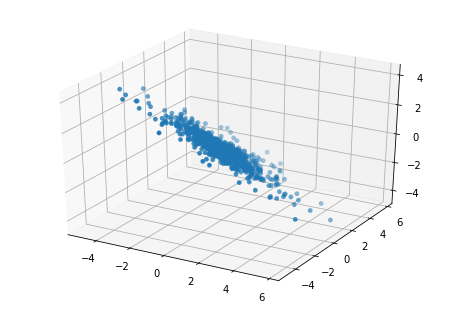

In [85]:
train['Discriminants'] = LDA.scalings_[0]*train.Lag1 + LDA.scalings_[1]*train.Lag2
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(train.Lag1, train.Lag2, train.Discriminants, linewidth=0.2);

In [93]:
test = smarket[smarket.Year >= 2005].copy()
X_test = test[['Lag1','Lag2']]
y_test = test.Direction

y_pred = LDA.predict(X_test);
pd.DataFrame(confusion_matrix(y_test, y_pred).T, columns = ['Down', 'Up'], index = ['Down', 'Up']) 

,Down,Up
Down,35,35
Up,76,106


In [102]:
p_pred = LDA.predict_proba(X_test)

print(np.sum(p_pred[:,0] >= 0.5))
print(np.sum(p_pred[:,0] < 0.5))

70
182
